In [1]:
# imports for array-handling and plotting
import numpy as np
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt
%matplotlib inline

# let's keep our keras backend tensorflow quiet
import os
# for testing on GPU
#os.environ['TF_CPP_MIN_LOG_LEVEL']='3'
# for testing on CPU
os.environ['CUDA_VISIBLE_DEVICES'] = ''

# keras imports for the dataset and building our neural network
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation, Dense
from keras.utils import np_utils
from keras import backend as K

from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
def classificator (directory):
    childDirectories = next(os.walk(directory))[1]
    for x in range(len(childDirectories)):
        childDirectories[x]=int(childDirectories[x])
    childDirectories.sort()
    for x in range(len(childDirectories)):
        childDirectories[x]=str(childDirectories[x])
    return childDirectories

In [3]:
# Variabili globali
train_data_dir = 'DITS-classification/classification train'
test_data_dir = 'DITS-classification/classification test'
nb_train_samples = 7489
nb_test_samples = 1159
epoche = 200
batch_size = 150
img_width, img_height = 32, 32

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255.0)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    color_mode="rgb",
    batch_size=nb_train_samples,
    classes = classificator(train_data_dir),
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    color_mode="rgb",
    batch_size=nb_test_samples,
    classes = classificator(test_data_dir),
    class_mode="categorical")

X_train = train_generator[0][0]
Y_train = train_generator[0][1]
X_test = test_generator[0][0]
Y_test = test_generator[0][1]

Found 7489 images belonging to 59 classes.
Found 1159 images belonging to 59 classes.


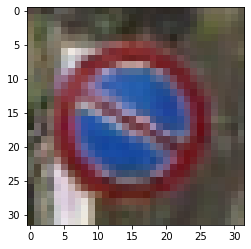

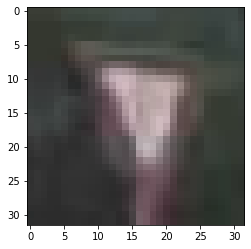

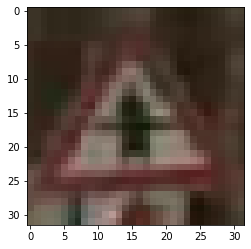

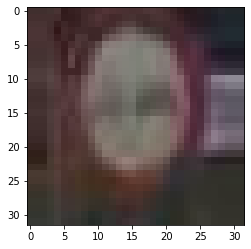

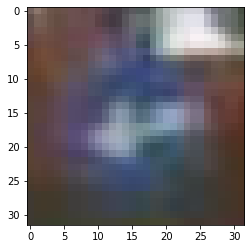

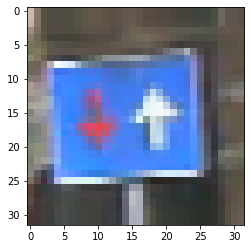

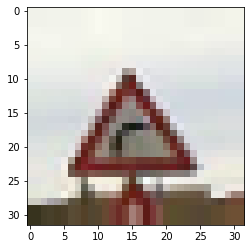

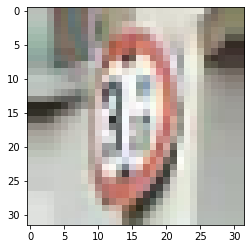

In [4]:
#Prima stampa di prova per vedere se l'import delle immagini funziona
for i in range (0,8):
    image = X_train[i]
    plt.imshow(image)
    plt.show()

In [5]:
#Operazioni la stampa finale
y_test = np.empty(len(Y_test),dtype=int)
for j in range(len(Y_test)):
    #print(j, "/", len(Y_test), end='\r')
    y_test[j]=(np.where(Y_test[j]==1)[0][0])

#Quest'ultima cosa serve per la stampa finale
immaginiPerLaStampaFinale=X_test

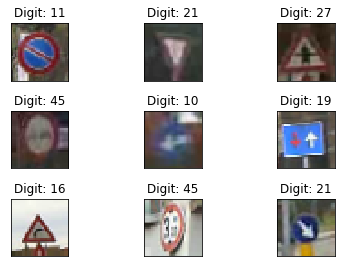

In [6]:
#Stampa di alcuni esempi con le relative digits
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], interpolation='none')
  plt.title("Digit: {}".format(np.where(Y_test[i]==1)[0][0]))
  plt.xticks([])
  plt.yticks([])
plt.show()

In [7]:
# Stampa delle shapes prima della reshapes e prima dell normalizzazione
print("X_train shape", X_train.shape)
print("y_train shape", Y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", Y_test.shape)

# Creando il vettore unico di dimensione img_width*img_height*pixels
X_train = X_train.reshape(7489, img_width*img_height*3)
X_test = X_test.reshape(1159, img_width*img_height*3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizzazione per velocizzare il training
X_train /= 255
X_test /= 255

# Stampa delle shapes finali
print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

X_train shape (7489, 32, 32, 3)
y_train shape (7489, 59)
X_test shape (1159, 32, 32, 3)
y_test shape (1159, 59)
Train matrix shape (7489, 3072)
Test matrix shape (1159, 3072)


In [8]:
# building a linear stack of layers with the sequential model
modelloCreatoDaMe = Sequential()
modelloCreatoDaMe.add(Dense(256, input_shape=(X_test.shape[1],)))
modelloCreatoDaMe.add(Activation('relu'))                            
modelloCreatoDaMe.add(Dropout(0.2))

modelloCreatoDaMe.add(Dense(256))
modelloCreatoDaMe.add(Activation('relu'))
modelloCreatoDaMe.add(Dropout(0.2))

modelloCreatoDaMe.add(Dense(59))
modelloCreatoDaMe.add(Activation('softmax'))

modelloCreatoDaMe.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [9]:
history = modelloCreatoDaMe.fit(X_train, Y_train,
                            batch_size=batch_size,
                            epochs=epoche,
                            verbose=2,
                            validation_data=(X_test, Y_test))

Train on 7489 samples, validate on 1159 samples
Epoch 1/200
 - 3s - loss: 3.7677 - accuracy: 0.0698 - val_loss: 3.8945 - val_accuracy: 0.0613
Epoch 2/200
 - 2s - loss: 3.5898 - accuracy: 0.0888 - val_loss: 3.8618 - val_accuracy: 0.0630
Epoch 3/200
 - 2s - loss: 3.4852 - accuracy: 0.1327 - val_loss: 3.7655 - val_accuracy: 0.1182
Epoch 4/200
 - 2s - loss: 3.2044 - accuracy: 0.1640 - val_loss: 3.5517 - val_accuracy: 0.1199
Epoch 5/200
 - 3s - loss: 2.9572 - accuracy: 0.2015 - val_loss: 3.4329 - val_accuracy: 0.1484
Epoch 6/200
 - 2s - loss: 2.8089 - accuracy: 0.2206 - val_loss: 3.3298 - val_accuracy: 0.1199
Epoch 7/200
 - 2s - loss: 2.6950 - accuracy: 0.2402 - val_loss: 3.2709 - val_accuracy: 0.1501
Epoch 8/200
 - 2s - loss: 2.5768 - accuracy: 0.2696 - val_loss: 3.1992 - val_accuracy: 0.1786
Epoch 9/200
 - 2s - loss: 2.4570 - accuracy: 0.3031 - val_loss: 3.1093 - val_accuracy: 0.2114
Epoch 10/200
 - 2s - loss: 2.3468 - accuracy: 0.3326 - val_loss: 3.0597 - val_accuracy: 0.1941
Epoch 11/20

Epoch 87/200
 - 2s - loss: 0.6098 - accuracy: 0.8006 - val_loss: 3.0120 - val_accuracy: 0.4142
Epoch 88/200
 - 2s - loss: 0.6019 - accuracy: 0.8081 - val_loss: 2.8410 - val_accuracy: 0.4409
Epoch 89/200
 - 2s - loss: 0.5918 - accuracy: 0.8087 - val_loss: 2.9676 - val_accuracy: 0.4366
Epoch 90/200
 - 2s - loss: 0.5925 - accuracy: 0.8101 - val_loss: 2.9605 - val_accuracy: 0.4383
Epoch 91/200
 - 2s - loss: 0.5645 - accuracy: 0.8109 - val_loss: 2.9909 - val_accuracy: 0.4236
Epoch 92/200
 - 2s - loss: 0.5750 - accuracy: 0.8143 - val_loss: 2.9820 - val_accuracy: 0.4288
Epoch 93/200
 - 2s - loss: 0.5700 - accuracy: 0.8085 - val_loss: 2.9142 - val_accuracy: 0.4374
Epoch 94/200
 - 2s - loss: 0.5700 - accuracy: 0.8123 - val_loss: 2.8806 - val_accuracy: 0.4219
Epoch 95/200
 - 2s - loss: 0.5585 - accuracy: 0.8172 - val_loss: 2.9065 - val_accuracy: 0.4374
Epoch 96/200
 - 2s - loss: 0.5490 - accuracy: 0.8249 - val_loss: 3.0096 - val_accuracy: 0.4349
Epoch 97/200
 - 2s - loss: 0.5378 - accuracy: 0.82

Epoch 173/200
 - 2s - loss: 0.2840 - accuracy: 0.9105 - val_loss: 3.6149 - val_accuracy: 0.4530
Epoch 174/200
 - 5s - loss: 0.2784 - accuracy: 0.9101 - val_loss: 3.5323 - val_accuracy: 0.4530
Epoch 175/200
 - 3s - loss: 0.2733 - accuracy: 0.9139 - val_loss: 3.5340 - val_accuracy: 0.4521
Epoch 176/200
 - 2s - loss: 0.2727 - accuracy: 0.9121 - val_loss: 3.7043 - val_accuracy: 0.4513
Epoch 177/200
 - 2s - loss: 0.2660 - accuracy: 0.9161 - val_loss: 3.4984 - val_accuracy: 0.4633
Epoch 178/200
 - 2s - loss: 0.2718 - accuracy: 0.9139 - val_loss: 3.4970 - val_accuracy: 0.4504
Epoch 179/200
 - 2s - loss: 0.2634 - accuracy: 0.9159 - val_loss: 3.6344 - val_accuracy: 0.4547
Epoch 180/200
 - 2s - loss: 0.2603 - accuracy: 0.9180 - val_loss: 3.5228 - val_accuracy: 0.4625
Epoch 181/200
 - 3s - loss: 0.2586 - accuracy: 0.9160 - val_loss: 3.6386 - val_accuracy: 0.4625
Epoch 182/200
 - 2s - loss: 0.2566 - accuracy: 0.9188 - val_loss: 3.5858 - val_accuracy: 0.4625
Epoch 183/200
 - 1s - loss: 0.2550 - acc

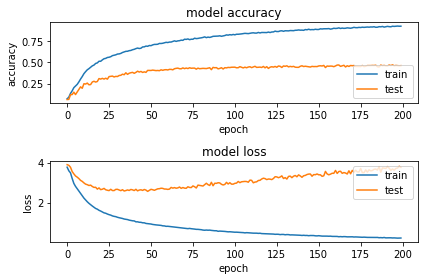

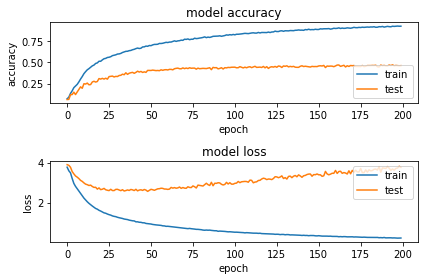

In [10]:
# Stampa degli andamenti dell'accuracy e della loss sia del train che della validation/test
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig

In [11]:
#Salvataggio dell'operato
save_dir = "results/"
model_name = 'HW5.h5'
model_path = os.path.join(save_dir, model_name)
modelloCreatoDaMe.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at results/HW5.h5 


In [12]:
modello_cartelli = load_model("results/HW5.h5")
loss_and_metrics = modello_cartelli.evaluate(X_test, Y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

Test Loss 3.7622733317746286
Test Accuracy 0.4616048336029053



535  classified correctly
624  classified incorrectly


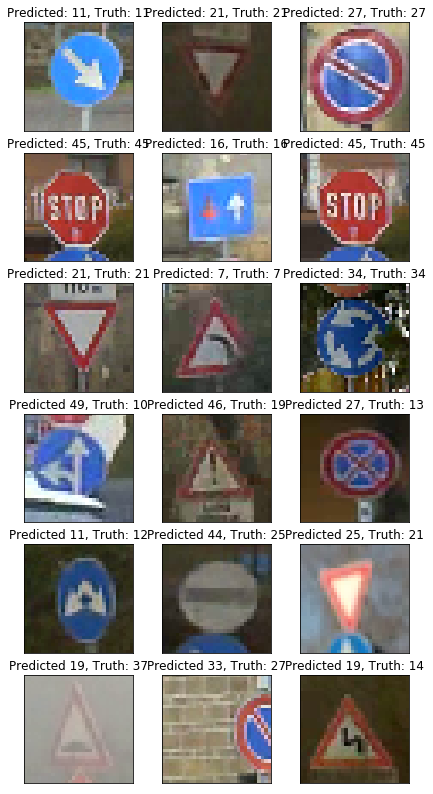

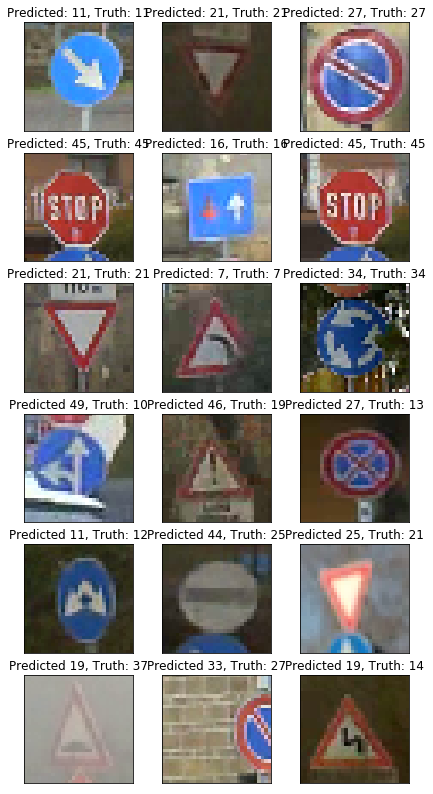

In [13]:
# Creazione delle predizioni sul test set sulla base del modello caricato
carica_model = load_model('results/HW5.h5')
predicted_classes = carica_model.predict_classes(X_test)

# Distinguo cosa è stato predetto bene e cosa no
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")

# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,14)

figure_evaluation = plt.figure()

# Stampa delle 9 predizioni corrette
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(immaginiPerLaStampaFinale[correct], interpolation='none')
    plt.title(
      "Predicted: {}, Truth: {}".format(predicted_classes[correct],
                                        y_test[correct]))
    plt.xticks([])
    plt.yticks([])
    
# Stampa delle 9 predizioni incorrette
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(immaginiPerLaStampaFinale[incorrect], interpolation='none')
    plt.title(
      "Predicted {}, Truth: {}".format(predicted_classes[incorrect], 
                                       y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])

figure_evaluation